# Bonus: Temperature Analysis I

In [31]:
import pandas as pd
from datetime import datetime as dt
import numpy as np
from scipy import stats

In [32]:
# "tobs" is "temperature observations"
df = pd.read_csv('./Resources/hawaii_measurements.csv')
df.head()
df.dtypes

station     object
date        object
prcp       float64
tobs         int64
dtype: object

In [33]:
# Convert the date column format from string to datetime

df1 = df
df1['date'] = pd.to_datetime(df['date'])
df1.dtypes

station            object
date       datetime64[ns]
prcp              float64
tobs                int64
dtype: object

In [34]:
# Set the date column as the DataFrame index
df1.set_index("date",inplace=True)
df1.head()

,station,prcp,tobs
date,,,
2010-01-01,USC00519397,0.08,65
2010-01-02,USC00519397,0.00,63
2010-01-03,USC00519397,0.00,74
2010-01-04,USC00519397,0.00,76
2010-01-06,USC00519397,NaN,73


In [ ]:
# Drop the date column
#same result acheived by inplace = True above

### Compare June and December data across all years 

In [37]:
from scipy import stats


Int64Index([1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
            ...
            8, 8, 8, 8, 8, 8, 8, 8, 8, 8],
           dtype='int64', name='date', length=19550)

In [46]:
# Filter data for desired months
june = df1[df1.index.month ==6]
dec = df1[df1.index.month ==12]
june.head()
dec.head()

,station,prcp,tobs
date,,,
2010-12-01,USC00519397,0.04,76
2010-12-03,USC00519397,0.00,74
2010-12-04,USC00519397,0.00,74
2010-12-06,USC00519397,0.00,64
2010-12-07,USC00519397,0.00,64


In [52]:
nulls = june['tobs'].isnull().sum()+dec['tobs'].isnull().sum()+june['tobs'].isna().sum()+dec['tobs'].isna().sum()
nulls

0

In [44]:
# Identify the average temperature for June
june.describe()

#June mean temp is 74.94

,prcp,tobs
count,1574.000000,1700.000000
mean,0.136360,74.944118
std,0.335731,3.257417
min,0.000000,64.000000
25%,0.000000,73.000000
50%,0.020000,75.000000
75%,0.120000,77.000000
max,4.430000,85.000000


In [45]:
# Identify the average temperature for December
dec.describe()

#dec mean temp is 71.04

,prcp,tobs
count,1405.000000,1517.000000
mean,0.216819,71.041529
std,0.541399,3.745920
min,0.000000,56.000000
25%,0.000000,69.000000
50%,0.030000,71.000000
75%,0.150000,74.000000
max,6.420000,83.000000


In [65]:
june1 = june.loc[~june.index.duplicated(keep='first')]
june1

,station,prcp,tobs
date,,,
2010-06-01,USC00519397,0.00,78
2010-06-02,USC00519397,0.01,76
2010-06-03,USC00519397,0.00,78
2010-06-04,USC00519397,0.00,76
2010-06-05,USC00519397,0.00,77
...,...,...,...
2017-06-30,USC00519397,0.08,75
2011-06-16,USC00513117,0.06,74
2011-06-22,USC00513117,0.22,74


In [68]:
# Create collections of temperature data
#collections created above in the june and dec data frames

merge = pd.concat([june, dec], axis=0)
merge

,station,prcp,tobs
date,,,
2010-06-01,USC00519397,0.00,78
2010-06-02,USC00519397,0.01,76
2010-06-03,USC00519397,0.00,78
2010-06-04,USC00519397,0.00,76
2010-06-05,USC00519397,0.00,77
...,...,...,...
2016-12-27,USC00516128,0.14,71
2016-12-28,USC00516128,0.14,71
2016-12-29,USC00516128,1.03,69


In [73]:
# Run paired t-test and unpaired t-test
#stats.ttest_rel(june['tobs'], dec['tobs'])
ts, p = stats.ttest_ind(june['tobs'], dec['tobs'], equal_var=False)
print(f'Tstatistic = {ts}, and p value = {p}')

Tstatistic = 31.355036920962423, and p value = 4.193529835915755e-187


### Analysis

##Unpaired T-tests

Paired t-test could not be used since it is used to compare samples of the same population and therefore have to be of the same size. 
Unpaired T-tests are performed to compare meants of two populations. Since these are independent populations of two different months, therefore unpaired t-tests are more appropriate

Also, since the p value is much less than .05, the null hypothesis is rejected and the temperatures sets vary by month for June and December. Also, shown in the graphic comparison below


In [77]:
import matplotlib.pyplot as plt

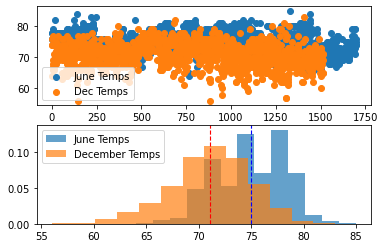

In [79]:
# plot
plt.subplot(2, 1, 1)
plt.scatter(range(len(june['tobs'])), june['tobs'], label="June Temps")
plt.scatter(range(len(dec['tobs'])), dec['tobs'], label="Dec Temps")
plt.legend()

plt.subplot(2, 1, 2)
plt.hist(june['tobs'], 13, density=True, alpha=0.69, label="June Temps")
plt.hist(dec['tobs'], 13, density=True, alpha=0.69, label="December Temps")
plt.axvline(np.mean(june['tobs']), color='b', linestyle='dashed', linewidth=1.13)
plt.axvline(np.mean(dec['tobs']), color='r', linestyle='dashed', linewidth=1.13)
plt.legend()
#plt.savefig('./Images/scatterhist.png')